In [ ]:
# Instalação das bibliotecas necessárias
!pip install plotly
!pip install seaborn

# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import locale



In [39]:
# Carregar o DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset_Cefem.csv')

# Corrigindo os nomes das colunas para corresponder aos dados
meses = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Mai.', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.']

# Configurações de estilo
sns.set()

# Função para formatar valores em reais (em milhões)
def format_currency_br(value):
    if pd.isna(value) or value == 0:
        return "R$ 0"
    if value >= 1000000:
        return f"R$ {value/1000000:.1f}M"
    elif value >= 1000:
        return f"R$ {value/1000:.1f}K"
    return f"R$ {value:.2f}"

# Função para formatar valores nos eixos
def format_axis_br(x, p):
    return format_currency_br(x)

# Tratamento da coluna Total
df['Total.'] = df['Total.'].astype(str)
df['Total.'] = df['Total.'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['Total.'] = pd.to_numeric(df['Total.'], errors='coerce')

# Tratamento das colunas mensais
for mes in meses:
    df[mes] = df[mes].astype(str)
    df[mes] = df[mes].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[mes] = pd.to_numeric(df[mes], errors='coerce')



<ipython-input-40-5783dea109f8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




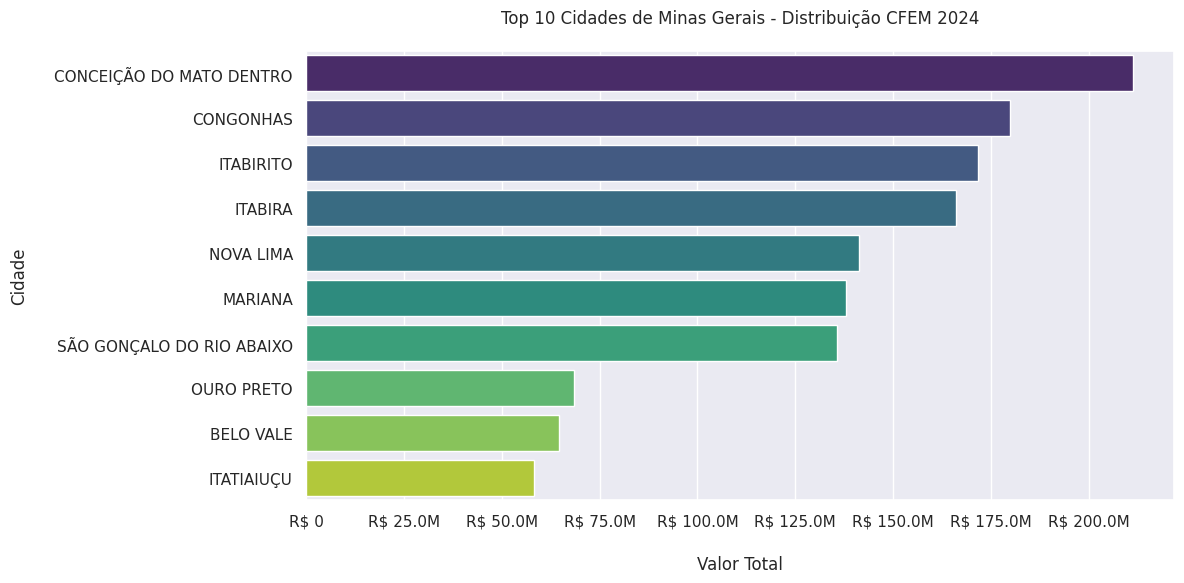

In [40]:
# 1. Gráfico de barras horizontal para as Top 10 cidades
plt.figure(figsize=(12, 6))
top_10 = df.nlargest(10, 'Total.')
ax = sns.barplot(data=top_10, y='Cidade', x='Total.', palette='viridis')
plt.title('Top 10 Cidades de Minas Gerais - Distribuição CFEM 2024', pad=20)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_axis_br))
plt.xlabel('\nValor Total')
plt.ylabel('Cidade\n')
plt.tight_layout()
plt.show()

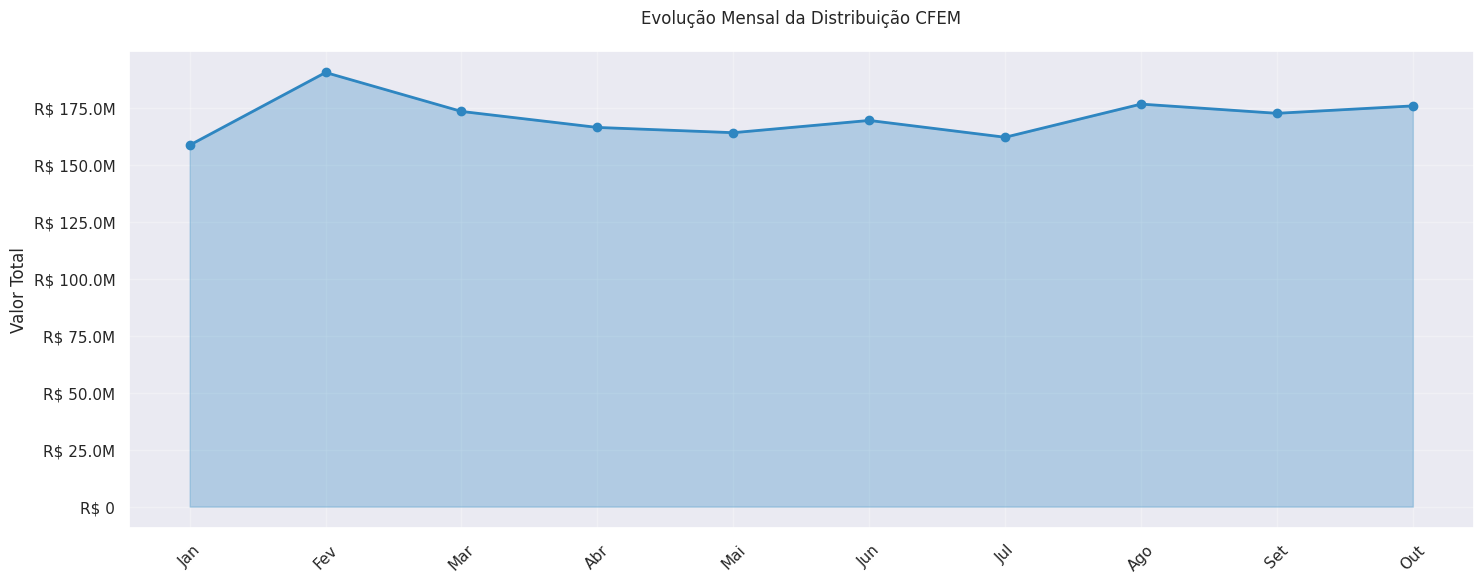

In [41]:
# 2. Gráfico de linha temporal
plt.figure(figsize=(15, 6))
valores_mensais = df[meses].sum()
x = range(len(valores_mensais))
ax = plt.gca()
plt.plot(x, valores_mensais.values, marker='o', linewidth=2, color='#2E86C1')
plt.fill_between(x, valores_mensais.values, alpha=0.3, color='#2E86C1')
plt.title('Evolução Mensal da Distribuição CFEM', pad=20)
plt.xticks(x, [m.replace('.', '') for m in meses], rotation=45)
plt.ylabel('Valor Total')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_axis_br))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [42]:
# 3. Gráfico de pizza interativo com Plotly
top_5_cidades = df.nlargest(5, 'Total.')
fig = go.Figure(data=[go.Pie(
    labels=top_5_cidades['Cidade'],
    values=top_5_cidades['Total.'],
    hole=.4,
    textinfo='percent+label',
    hovertemplate="<b>Cidade:</b> %{label}<br>" +
                  "<b>Valor:</b> R$ %{value:,.2f}<br>" +
                  "<b>Percentual:</b> %{percent}<br>" +
                  "<extra></extra>"
)])
fig.update_layout(
    title='Distribuição CFEM - Top 5 Cidades',
    annotations=[dict(text='CFEM 2024', x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

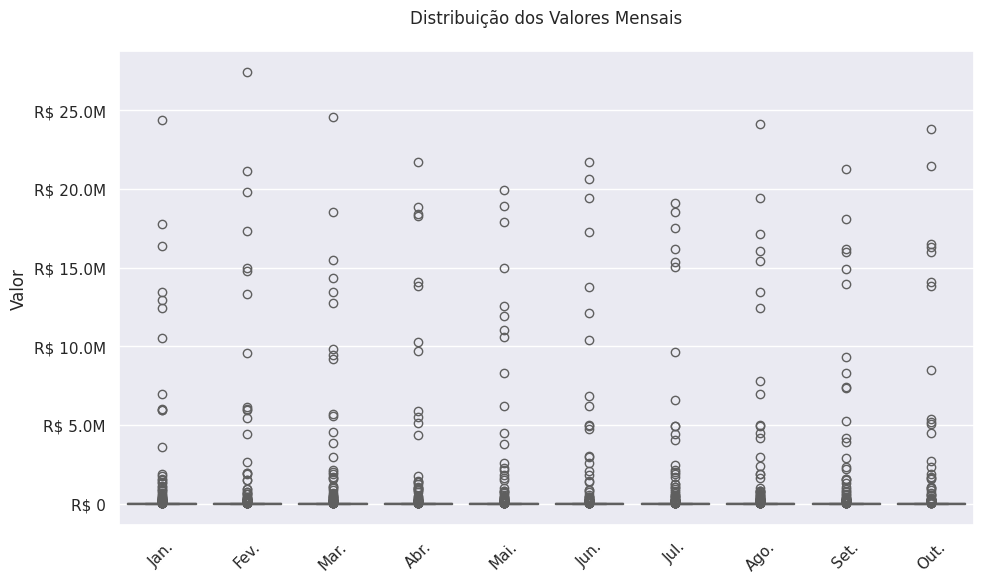

In [43]:
# 4. Box plot para análise de distribuição dos valores
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df[meses], palette='Set3')
plt.title('Distribuição dos Valores Mensais', pad=20)
plt.xticks(rotation=45)
plt.ylabel('Valor')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_axis_br))
plt.tight_layout()
plt.show()

In [54]:
# 5. Estatísticas gerais em indicadores
def format_value(value):
    if value > 1000000:
        return value / 1000000
    return value

# Calcular valores
total = format_value(df['Total.'].sum())
media = format_value(df['Total.'].mean())
maximo = format_value(df['Total.'].max())
minimo = df[df['Total.'] > 0]['Total.'].min()  # Não converter para milhões
desvio = format_value(df['Total.'].std())
num_cidades = len(df[df['Total.'] > 0])

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
           [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}]]
)

# Adicionar indicadores
fig.add_trace(
    go.Indicator(
        mode="number",
        value=total,
        title={"text": "Total Distribuído"},
        number={
            'valueformat': '.2f',
            'font': {'size': 40},
            'prefix': 'R$ ',
            'suffix': 'M'
        }
    ),
    row=1, col=1
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=media,
        title={"text": "Média por Cidade"},
        number={
            'valueformat': '.2f',
            'font': {'size': 40},
            'prefix': 'R$ ',
            'suffix': 'M'
        }
    ),
    row=1, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=maximo,
        title={"text": "Maior Valor"},
        number={
            'valueformat': '.2f',
            'font': {'size': 40},
            'prefix': 'R$ ',
            'suffix': 'M'
        }
    ),
    row=1, col=3
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=minimo,
        title={"text": "Menor Valor (não zero)"},
        number={
            'valueformat': '.2f',
            'font': {'size': 40},
            'prefix': 'R$ '
        }
    ),
    row=2, col=1
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=desvio,
        title={"text": "Desvio Padrão"},
        number={
            'valueformat': '.2f',
            'font': {'size': 40},
            'prefix': 'R$ ',
            'suffix': 'M'
        }
    ),
    row=2, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=num_cidades,
        title={"text": "Número de Cidades"},
        number={
            'font': {'size': 40}
        }
    ),
    row=2, col=3
)

fig.update_layout(
    height=500,
    title={
        'text': 'Estatísticas Gerais da Distribuição CFEM em Minas Gerais no ano de 2024',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    showlegend=False,
    grid={'rows': 2, 'columns': 3, 'pattern': "independent"},
    margin=dict(t=100, b=50, l=50, r=50),
    paper_bgcolor='white',
    plot_bgcolor='white',
)
fig.show()
